# **Multivariate Linear Regression**

#### **The Model:**

Lets denote the multivariate model by a model expressed as $f_{\vec{w},b}(\mathbf{X})$

- $\mathbf{X}$ is a $m x n$ matrix where $m$ is the number of samples and $n$ is the number of features.

$$
\mathbf{X} =
\begin{bmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m,1} & x_{m,2} & \cdots & x_{m,n} \\
\end{bmatrix}
$$

- $\vec{w}$ is the vector of weights.

$$
\vec{w} =
\begin{bmatrix}
w_{1} \\
w_{2} \\
\vdots \\
w_{m} \\
\end{bmatrix}
$$

- $b$ is known as bias.

Therefore, the model:

$$f_{\vec{w},b}(\mathbf{X}) = \mathbf{X} \vec{w} + b \tag{1}$$

<br />

#### **The Cost function:**

$$ J(\vec{w}, b) = \frac{1}{m} \mathbf{X}^T (\mathbf{X} \vec{w} + b - \vec{y}) \tag{2}$$

- $\mathbf{X}^T$ is the feature matrix transposed.
- $\vec{y}$ is the target vector.

$$
\vec{y} =
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{m} \\
\end{bmatrix}
$$

<br/>

#### **The the Gradient:**

$$\frac{\partial J}{\partial \vec{w}} = \frac{1}{m} \mathbf{X}^T (\mathbf{X} \vec{w} + b - \vec{y}) \tag{3}$$
$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\mathbf{X} \vec{w} + b - \vec{y})
 \tag{4}$$

\begin{align}
w = w - \alpha \frac{\partial J(w,b)}{\partial w} \tag{5}\\
b = b - \alpha \frac{\partial J(w,b)}{\partial b} \tag{6}\\
\end{align}

**Conventions:**
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(\vec{w},b)$ With Respect To $b$.

In [31]:
# import the necessary pkgs:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set()

In [32]:
class MultivariateLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        
        for epoch in range(self.epochs):
            y_pred = self.predict(X)
            dj_dw = (1/m) * np.dot(X.T, (y_pred - y))
            dj_db = (1/m) * np.sum(y_pred - y)
            
            self.weights -= self.learning_rate * dj_dw
            self.bias -= self.learning_rate * dj_db
            
            cost = self.cost_function(X, y)
            self.cost_history.append(cost)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def cost_function(self, X, y):
        m = len(y)
        y_pred = self.predict(X)
        cost = (1/(2*m)) * np.sum((y_pred - y)**2)
        return cost

In [24]:
# load the California housing dataset:
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [25]:
# standardize the dataset:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
# split the data into features and target:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = MultivariateLinearRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f"Weights: {model.weights}")
print(f"Bias: {model.bias}")

Weights: [3.08698327 1.13548264 2.3254224 ]
Bias: 3.2641322820333336


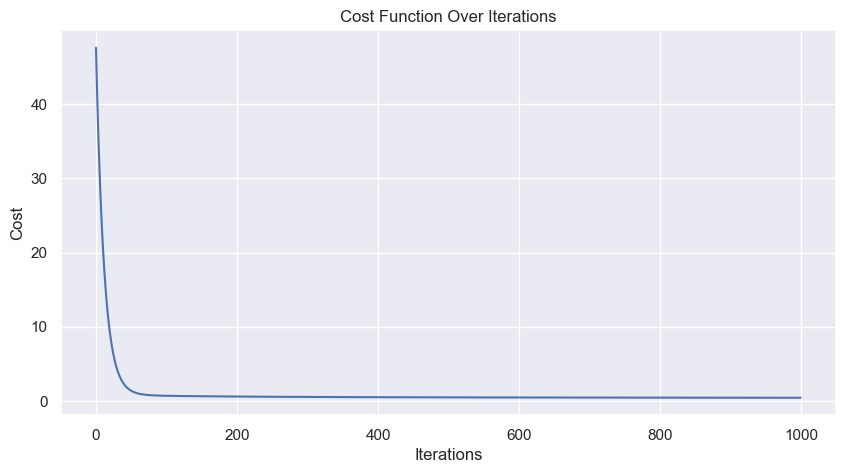

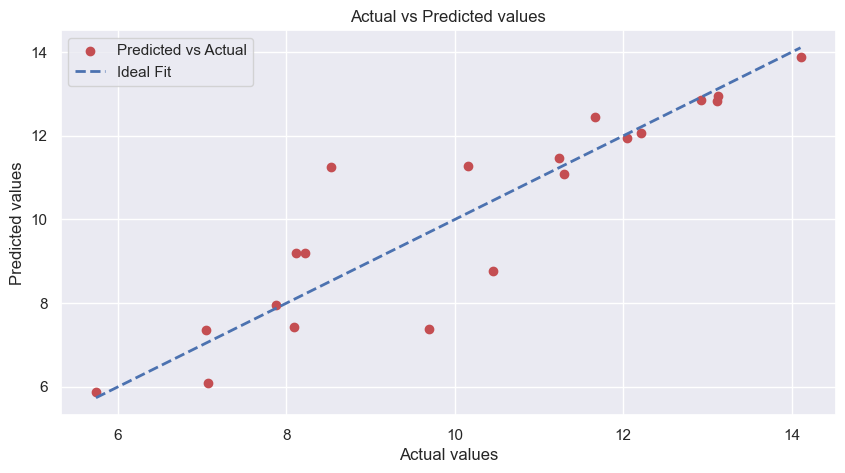

In [42]:
# plotting the cost function over iterations:
plt.figure(figsize=(10, 5))
plt.plot(range(model.epochs), model.cost_history, 'b-')
plt.title('Cost Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# plotting Actual vs Predicted values:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, predictions, c='r', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2, label='Ideal Fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()